## Load libraries

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-1-c9b7b4ce868d>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## Load dataset

In [2]:
# load the dataset
df = pd.read_csv("dataset/DSE BATBC Stock Data.csv", header=0, index_col=None, delimiter=',')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/5/2015,4122.32,4075.02,4134.68,4038.66,41.30K,1.44%
1,1/6/2015,4201.65,4098.76,4205.97,4076.65,40.23K,1.92%
2,1/7/2015,4191.79,4200.27,4211.25,4163.02,32.11K,-0.23%
3,1/8/2015,4185.99,4184.77,4224.98,4158.75,31.42K,-0.14%
4,1/9/2015,4171.90,4171.26,4237.06,4169.07,29.73K,-0.34%


In [3]:
print(df.shape)
print(df.columns)
print(len(df))

(1219, 7)
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
1219


## Explanatory Data Analysis 

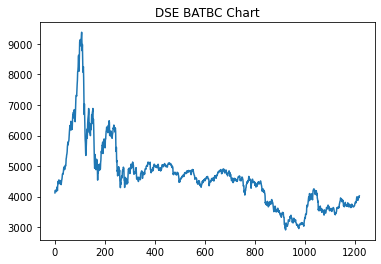

In [4]:
df['Price'].plot()
plt.title("DSE BATBC Chart")
plt.show()

Text(0.5, 1.0, 'DSE BATBC Cumulative Return')

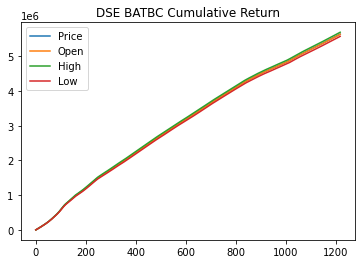

In [5]:
dr = df.cumsum()
dr.plot()
plt.title('DSE BATBC Cumulative Return')

Text(0.5, 1.0, 'DSE BATBC Autocorrelation')

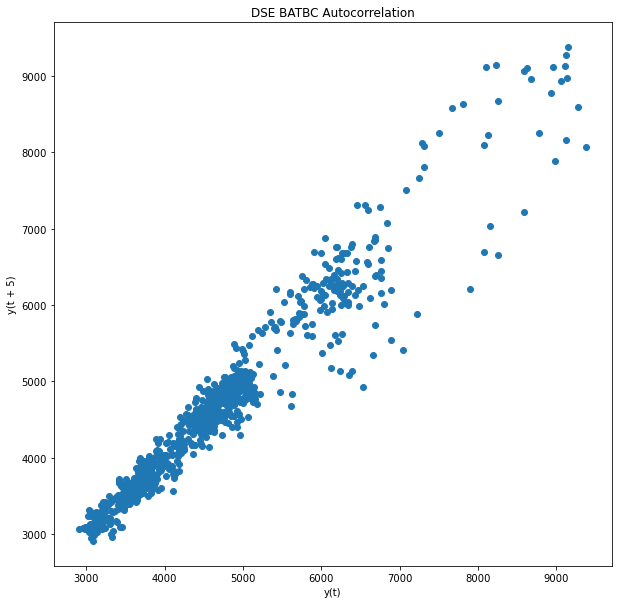

In [6]:
plt.figure(figsize=(10,10))
lag_plot(df['Price'], lag=5)
plt.title('DSE BATBC Autocorrelation')

# ARIMA

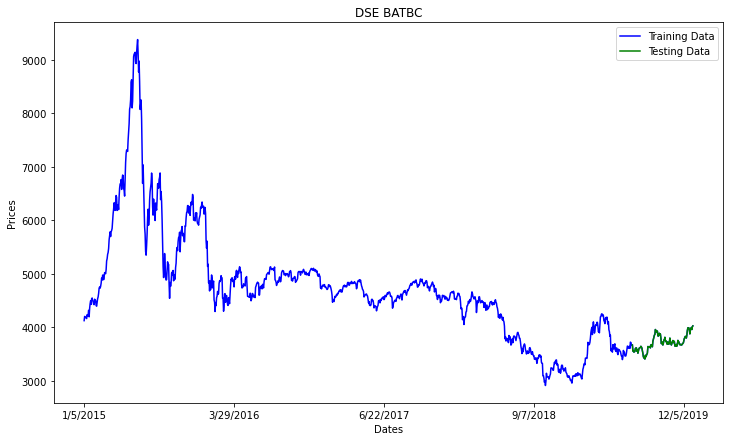

In [7]:
train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]
plt.figure(figsize=(12,7))
plt.title('DSE BATBC')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Price'], 'blue', label='Training Data')
plt.plot(test_data['Price'], 'green', label='Testing Data')
plt.xticks(np.arange(0,len(df), 300), df['Date'][0:len(df):300])
plt.legend()

In [8]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [9]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 1993.134
Symmetric mean absolute percentage error: 4.268


In [10]:
predictions

[array([3685.64806006]),
 array([3666.53618924]),
 array([3664.32060646]),
 array([3547.39587983]),
 array([3575.76728888]),
 array([3540.82762764]),
 array([3538.66415461]),
 array([3532.78183605]),
 array([3596.75959844]),
 array([3603.29845911]),
 array([3599.89196162]),
 array([3570.13484478]),
 array([3589.14232462]),
 array([3511.93904164]),
 array([3561.69165697]),
 array([3583.39050079]),
 array([3600.67924254]),
 array([3612.83072476]),
 array([3627.63564639]),
 array([3636.41009554]),
 array([3611.36647665]),
 array([3529.40098955]),
 array([3551.84691818]),
 array([3434.79129873]),
 array([3472.96600903]),
 array([3428.93551836]),
 array([3464.59452773]),
 array([3403.16790978]),
 array([3451.46461834]),
 array([3485.54977557]),
 array([3393.7044949]),
 array([3495.75342031]),
 array([3548.09204968]),
 array([3643.57229292]),
 array([3628.14216794]),
 array([3657.88895895]),
 array([3642.66539304]),
 array([3571.36359434]),
 array([3638.25435045]),
 array([3660.97942167]),
 

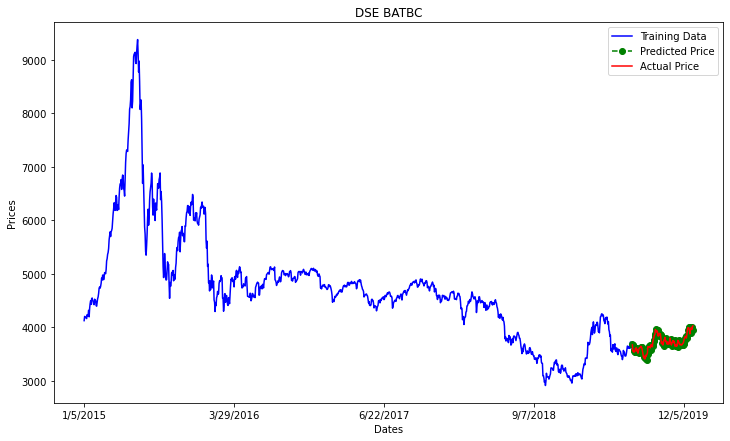

In [11]:
plt.figure(figsize=(12,7))
plt.plot(df['Price'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Price'], color='red', label='Actual Price')
plt.title('DSE BATBC')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,len(df), 300), df['Date'][0:len(df):300])
plt.legend()

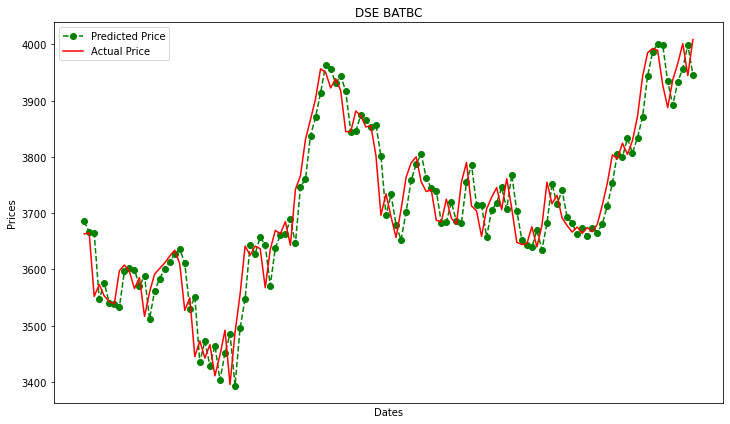

In [12]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,len(df), 60), df['Date'][1486:len(df):60])
plt.title('DSE BATBC')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()